<a href="https://colab.research.google.com/github/IvanSalinas2000/Preprocesamiento-y-clasificacion-de-datos/blob/main/Tarea3/Tarea3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

data = pd.read_csv("/content/IMDB Dataset SPANISH.csv", encoding="latin1")  # Prueba encoding si hay errores de lectura
data.head()

,review_en,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [2]:

data

,review_en,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
!pip install scikeras

Evaluación para SVM:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      4961
           1       0.85      0.88      0.87      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



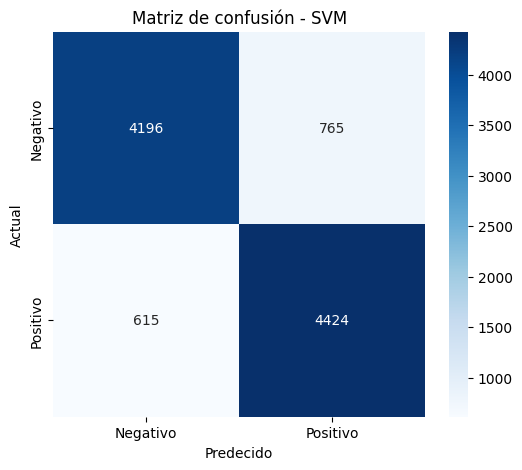

Evaluación para Naive Bayes:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      4961
           1       0.82      0.85      0.83      5039

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



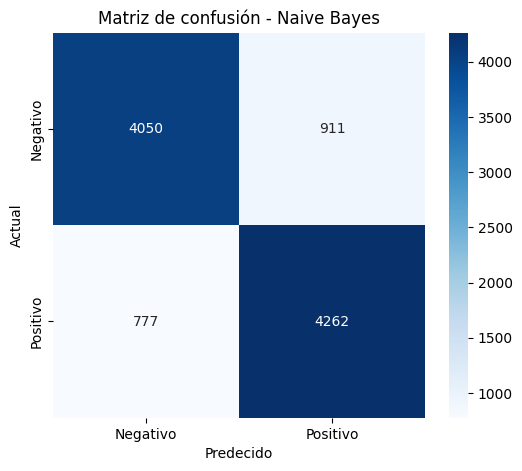

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:07:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Evaluación para XGBoost:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      4961
           1       0.83      0.86      0.85      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



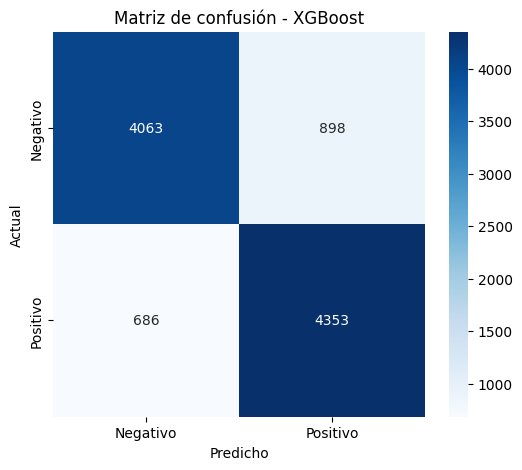

In [6]:
import re
import string
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento de texto
def preprocess_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    return text

data['clean_text'] = data['review_en'].apply(preprocess_text)

# Vectorización con TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Convertir las etiquetas a numéricas
label_encoder = LabelEncoder()
data['sentiment_numeric'] = label_encoder.fit_transform(data['sentiment'])

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(
    data['clean_text'], data['sentiment_numeric'], test_size=0.2, random_state=42
)

# Modelos
models = {
    "SVM": SVC(),
    "Naive Bayes": MultinomialNB(),
}

# Función de entrenamiento y evaluación
def train_evaluate(model_name, model):
    pipeline = Pipeline([
        ('vectorizer', vectorizer),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f"Evaluación para {model_name}:")
    print(classification_report(y_test, y_pred))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
    plt.title(f"Matriz de confusión - {model_name}")
    plt.xlabel('Predecido')
    plt.ylabel('Actual')
    plt.show()

# Entrenamiento de modelos SVM y Naive Bayes
for name, model in models.items():
    train_evaluate(name, model)

# Entrenamiento de XGBoost fuera del pipeline
xgb_model = XGBClassifier(eval_metric='logloss', use_label_encoder=False)
xgb_model.fit(vectorizer.fit_transform(X_train), y_train)
y_pred_xgb = xgb_model.predict(vectorizer.transform(X_test))

print("Evaluación para XGBoost:")
print(classification_report(y_test, y_pred_xgb))

# Matriz de confusión para XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.title("Matriz de confusión - XGBoost")
plt.xlabel('Predicho')
plt.ylabel('Actual')
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Evaluación para Neural Network:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      4961
           1       0.86      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



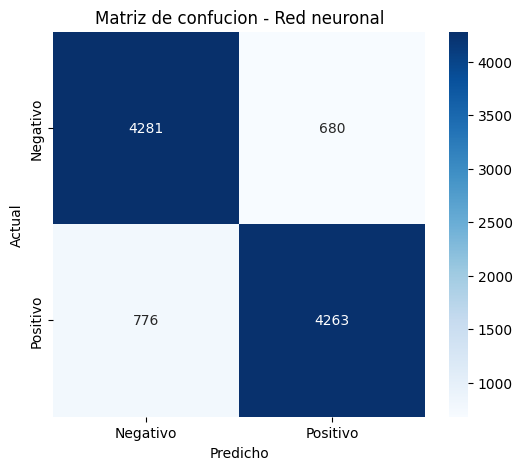

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Red Neuronal con Keras (sin usar scikeras)
def build_nn():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(1000,)),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Convertir las reseñas a vectores TF-IDF
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Crear y entrenar el modelo de red neuronal
nn_model = build_nn()
nn_model.fit(X_train_vec, y_train, epochs=5, batch_size=16, verbose=0)

# Evaluar el modelo
y_pred_nn = (nn_model.predict(X_test_vec) > 0.5).astype("int32")

print("Evaluación para Neural Network:")
print(classification_report(y_test, y_pred_nn))

# Matriz de confusión para la red neuronal
cm_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.title("Matriz de confucion - Red neuronal")
plt.xlabel('Predicho')
plt.ylabel('Actual')
plt.show()


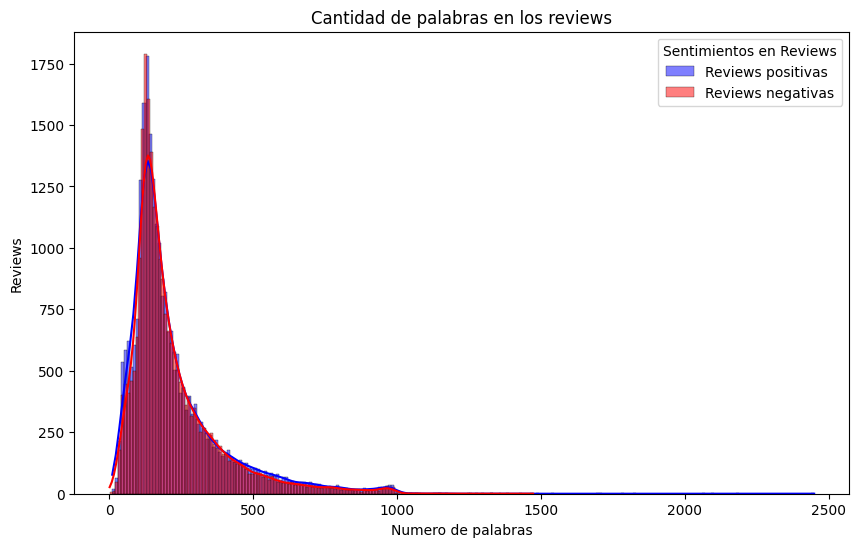

<ipython-input-8-a6798b0d2b61>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Positivo', 'Negativo'], y=[positive_percentage, negative_percentage], palette='muted')


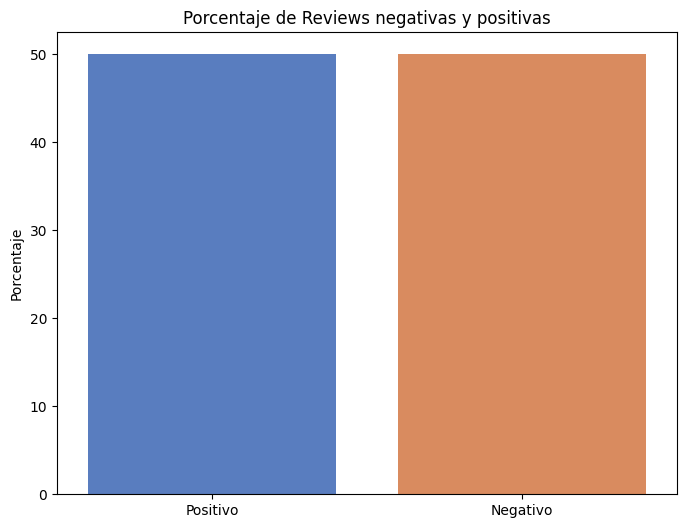

In [8]:

# Añadir columna del número de palabras en cada reseña
data['num_words'] = data['clean_text'].apply(lambda x: len(x.split()))

# Filtrar reseñas positivas y negativas
positive_reviews = data[data['sentiment_numeric'] == 1]
negative_reviews = data[data['sentiment_numeric'] == 0]

# Gráfico de histograma: cantidad de palabras en reseñas positivas y negativas
plt.figure(figsize=(10, 6))
sns.histplot(positive_reviews['num_words'], color='blue', kde=True, label='Reviews positivas', stat='count')
sns.histplot(negative_reviews['num_words'], color='red', kde=True, label='Reviews negativas', stat='count')
plt.title('Cantidad de palabras en los reviews')
plt.xlabel('Numero de palabras')
plt.ylabel('Reviews')
plt.legend(title="Sentimientos en Reviews")
plt.show()

# Gráfico comparativo de estadísticas descriptivas
positive_percentage = len(positive_reviews) / len(data) * 100
negative_percentage = len(negative_reviews) / len(data) * 100

plt.figure(figsize=(8, 6))
sns.barplot(x=['Positivo', 'Negativo'], y=[positive_percentage, negative_percentage], palette='muted')
plt.title('Porcentaje de Reviews negativas y positivas')
plt.ylabel('Porcentaje')
plt.show()


In [9]:
# Contar la cantidad de reseñas positivas y negativas
positive_count = len(data[data['sentiment_numeric'] == 1])
negative_count = len(data[data['sentiment_numeric'] == 0])

# Mostrar los resultados
print(f"Cantidad de reseñas positivas: {positive_count}")
print(f"Cantidad de reseñas negativas: {negative_count}")


Cantidad de reseñas positivas: 25000
Cantidad de reseñas negativas: 25000


In [20]:
data


,review_en,sentiment,clean_text,sentiment_numeric,num_words
33553,I really liked this Summerslam due to the look...,positive,i really liked this summerslam due to the look...,1,201
9427,Not many television shows appeal to quite as m...,positive,not many television shows appeal to quite as m...,1,345
199,The film quickly gets to a major chase scene w...,negative,the film quickly gets to a major chase scene w...,0,115
12447,Jane Austen would definitely approve of this o...,positive,jane austen would definitely approve of this o...,1,92
39489,Expectations were somewhat high for me when I ...,negative,expectations were somewhat high for me when i ...,0,320
...,...,...,...,...,...
28567,Although Casper van Dien and Michael Rooker ar...,negative,although casper van dien and michael rooker ar...,0,221
25079,I liked this movie. I wasn't really sure what ...,positive,i liked this movie i wasnt really sure what it...,1,75
18707,Yes non-Singaporean's can't see what's the big...,positive,yes nonsingaporeans cant see whats the big dea...,1,214
15200,"As far as films go, this is likable enough. En...",negative,as far as films go this is likable enough ente...,0,136
